## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*TODO*

Answer: I would take a Predictive Approach for this project since the task requires that we make a prediction about the quality of wine, which will be facilitated using the data provided through the use of analytical methods for finding the trends in the data. This approach will include looking at some correlations between the different features in the data and removing these correlated features to make sure that the model's accuracy doesn't get affected, removing or replacing certain feature values, engineering more features and analyzing trends related to these features, and then using the preprocessed data to feed to a model to learn the underlying pattern and make a suitable prediction. 

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*TODO*

For this problem it is instrumental that we have floating point and integer typed values as the type of our features to leverage effective machine learning models.

### Data Collection

**Q3. From where do we get our data?**

*TODO*
We will be using the dataset winequality-red.csv as provided by the instructor, and can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/wine+quality.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

ANSWER: According to the website https://archive.ics.uci.edu/ml/datasets/wine+quality, the dataset provided about red vinho verde wine samples was taken from the north of Portugal, and donated in 2009 to the website mentioned above.


**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

ANSWER: By knowing the impact of each variable in the wine we can derive the most important factors in creating quality wine, as a result wine makers can improve their wine creation process by reducing certain factors and increasing others, which is helpful for setting prices.

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

wine_data = pd.read_csv("winequality-red.csv", sep=",")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine_data.shape

(1599, 12)

In [3]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

<li>Check for missing values and handle if any</li>
From the graph below we notice there are no missing values for any features

<AxesSubplot:>

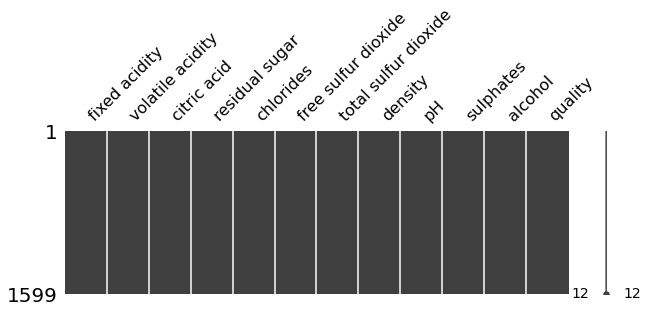

In [4]:
msno.matrix(wine_data,figsize=(10,3))


<li>Check for outliers if any and handle them</li>


<AxesSubplot:xlabel='pH', ylabel='quality'>

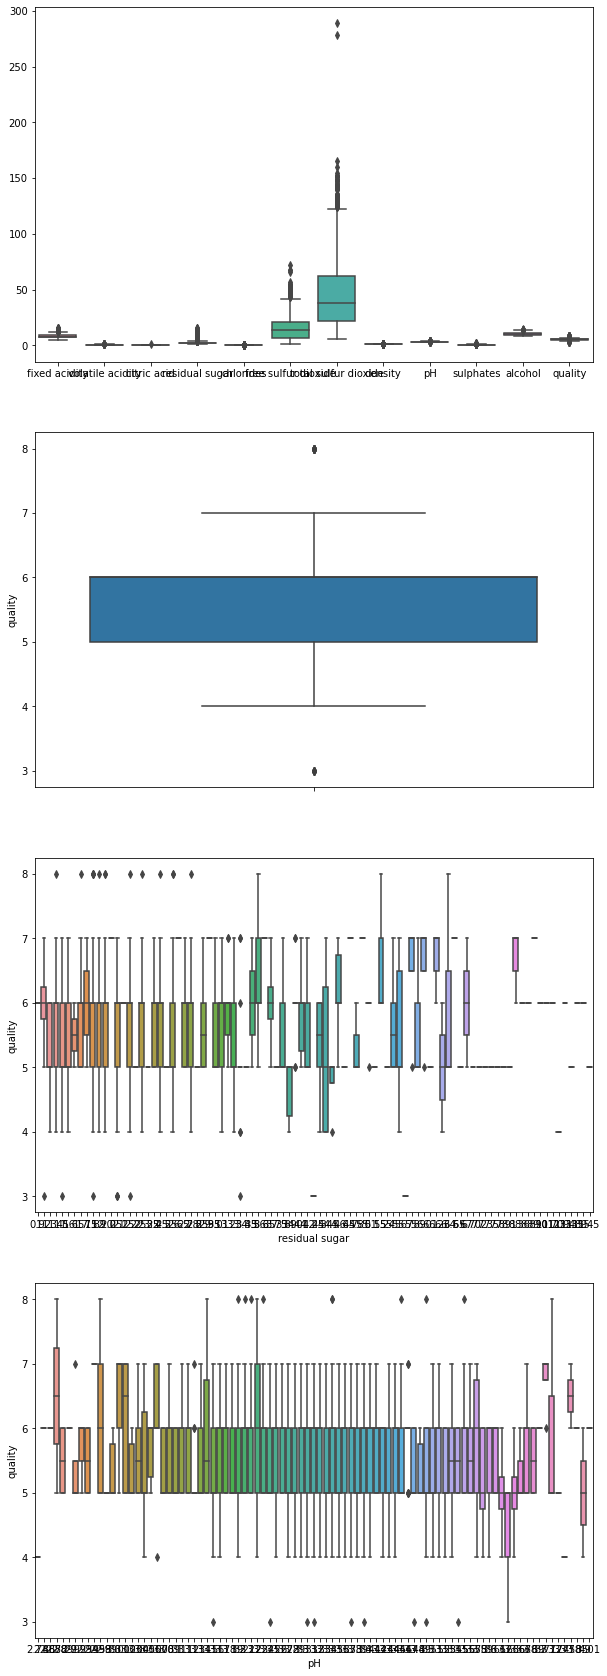

In [5]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sn.boxplot(data=wine_data,orient="v",ax=axes[0])
sn.boxplot(data=wine_data,y="quality",orient="v",ax=axes[1])
sn.boxplot(data=wine_data,y="quality",x="residual sugar",orient="v",ax=axes[2])
sn.boxplot(data=wine_data,y="quality",x="pH",orient="v",ax=axes[3])

<p>In the following cell we removed the outliers by finding the absolute value of the z-score for each column. This means we represent the values each cell as the number of standard deviation away from the mean for their respective features/columns. Then we filter out the cells with z-scores greater than threshold which I defined to be 3 since, by theory, most data points (99.8% of data points) must exist 3 standard deviations away from the mean. Thus, anything greater than this threshold must then be an outlier. </p>

In [6]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(wine_data))
print(z.shape)
# print(np.where(z > 3))
# print(z[13][9])
# print(z[55])



(1599, 12)


In [7]:
threshold = 3
wine_data = wine_data[(z < threshold).all(axis=1)]
wine_data.shape

(1451, 12)

<li>Implement Correlation heatmap</li>

<AxesSubplot:>

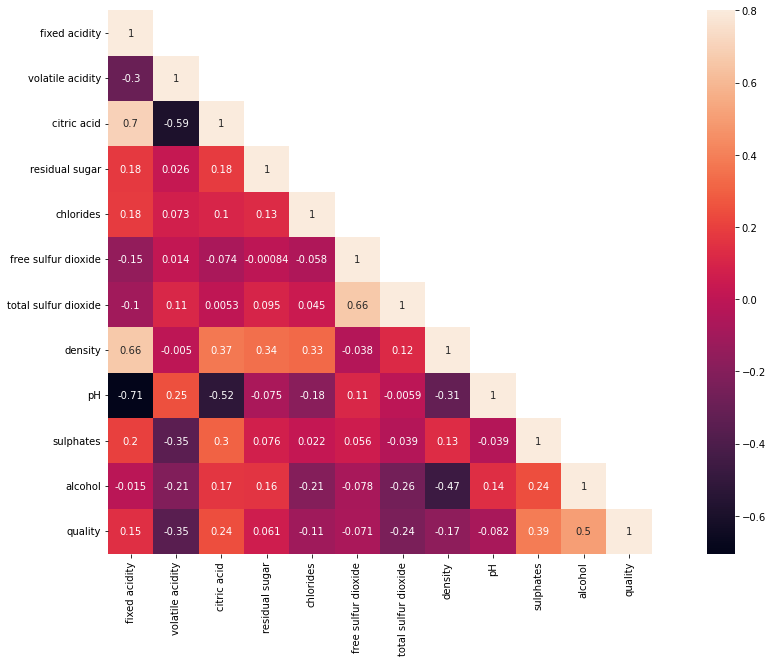

In [8]:
# Correlation analysis
corrMatt = wine_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<li>Check the distribution of data using histograms</li>

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

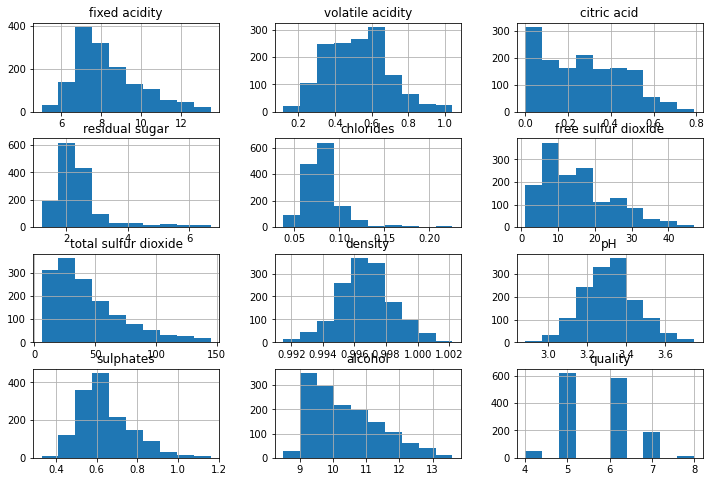

In [9]:
wine_data.hist(['fixed acidity','volatile acidity',	'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality'], figsize=(12,8))

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

<p>For this question, I will use Random Forest and SVM as my multivariable regression algorithms.</p>

<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

features = wine_data.drop('quality', axis=1)
labels = wine_data['quality']
# labels.shape
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=test_size, random_state=1)



In [11]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
X_train.shape

(1160, 11)

In [13]:
y_train.shape

(1160,)

In [14]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Multiple Linear Regression: Support Vector Machine

In [15]:
svc = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.378 (+/-0.079) for {'C': 0.1, 'kernel': 'rbf'}
0.414 (+/-0.104) for {'C': 1, 'kernel': 'rbf'}
0.306 (+/-0.112) for {'C': 10, 'kernel': 'rbf'}


In [16]:
best_svc = cv.best_estimator_

In [17]:
y_pred_svc = best_svc.predict(X_test)


In [18]:
len(y_pred_svc)

291

### Multiple Linear Regression: Random Forest

In [19]:
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=10)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.286 (+/-0.135) for {'max_depth': 2, 'n_estimators': 5}
0.312 (+/-0.107) for {'max_depth': 2, 'n_estimators': 50}
0.313 (+/-0.101) for {'max_depth': 2, 'n_estimators': 250}
0.368 (+/-0.127) for {'max_depth': 4, 'n_estimators': 5}
0.383 (+/-0.145) for {'max_depth': 4, 'n_estimators': 50}
0.389 (+/-0.144) for {'max_depth': 4, 'n_estimators': 250}
0.363 (+/-0.189) for {'max_depth': 8, 'n_estimators': 5}
0.452 (+/-0.196) for {'max_depth': 8, 'n_estimators': 50}
0.457 (+/-0.196) for {'max_depth': 8, 'n_estimators': 250}
0.376 (+/-0.268) for {'max_depth': 16, 'n_estimators': 5}
0.468 (+/-0.22) for {'max_depth': 16, 'n_estimators': 50}
0.486 (+/-0.226) for {'max_depth': 16, 'n_estimators': 250}
0.375 (+/-0.274) for {'max_depth': 32, 'n_estimators': 5}
0.483 (+/-0.212) for {'max_depth': 32, 'n_estimators': 50}
0.49 (+/-0.218) for {'max_depth': 32, 'n_estimators': 250}
0.358 (+/-0.241) for {'max_depth': None, 'n_estimators': 5}
0.478 (+/-0.2

In [20]:
rf = RandomForestRegressor(random_state=1, max_depth=16, n_estimators=250)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=250, random_state=1)

In [21]:
y_pred_rf = rf.predict(X_test)

In [22]:
len(y_pred_rf)

291

#### As a slight detour, let's also generate a figure showing the most important features for the Random Forest to see which features we should include in creating an NN.

In [23]:
rf_temp = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_data.drop(['quality'] , axis = 1)
temp_wine_data = pd.get_dummies(wine_data)
rf_temp.fit(features, wine_data['quality'])
display(rf_temp.feature_importances_)

array([0.04197691, 0.10182017, 0.06032171, 0.05195373, 0.06338062,
       0.03991618, 0.08013138, 0.04856052, 0.0586216 , 0.14883862,
       0.30447857])

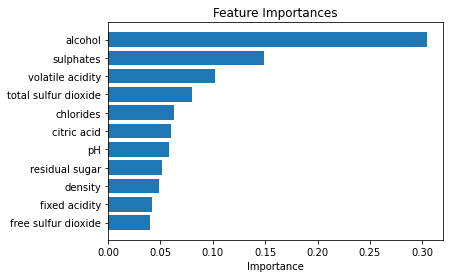

In [24]:
features = temp_wine_data.columns
importances = rf_temp.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

### Note: We will use the features with the lowest importance as indicated in the figure above. More specifically, density, fixed acidity, and free sulfur dioxide.

## Artificial Neural Network

### Let's start fresh by importing the wine data again

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder

wine_data = pd.read_csv("winequality-red.csv", sep=",")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### We remove the outliers

In [26]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(wine_data))
print(z.shape)

(1599, 12)


In [27]:
threshold = 3
wine_data = wine_data[(z < threshold).all(axis=1)]
wine_data.shape

(1451, 12)

### Here we introduce a new column indicating what is good quality wine and what is not.

In [28]:
wine_data['goodquality'] = [1 if x >= 7 else 0 for x in wine_data['quality']]

X = wine_data.drop(['quality','goodquality'], axis = 1)

y = wine_data['goodquality']

#### NOTE: Here I will use the least significant factors based on the importance features of the Random Forest. This does not in any way mean that the Neural Network will best predict the quality of wine when these factors are used.

In [29]:
del X['fixed acidity']
del X['free sulfur dioxide']
del X['citric acid']

In [30]:
from collections import Counter
print(Counter(y))

Counter({0: 1250, 1: 201})


#### Notice that the minority classes in the data is too under-represented from the counter shown above. This is important to address because having a massive imbalance between majority and minority classes can introduce a bias towards the majority classes. To address this problem I will bring in an over-sampling tool called SMOTE. This will allow us to create more balance within our data by specifying certain parameters like the sampling strategy which allows us to map a certain number of data points corresponding to each class label. This will allow each class to have the same amount of data points for each class ridding the data of the severe imbalance it once had earlier. Note: the sample size I decided on was based on trial and error, the provided sample size is simply the one that seemed to give me the best results.

In [31]:
from imblearn.over_sampling import SMOTE

sample_size = 1700
oversample = SMOTE(sampling_strategy={0: sample_size, 1: sample_size})
X, y = oversample.fit_resample(X, y)

C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1250)
  warnings.warn(
C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1250)
  warnings.warn(


In [32]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=.3, random_state=0)

In [33]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_nn = sc.fit_transform(X_train_nn)
X_test_nn = sc.fit_transform(X_test_nn)

In [34]:
n_classes = 2 # because we only have 6 categories
y_train_cat = tf.keras.utils.to_categorical(y_train_nn, n_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test_nn, n_classes)

In [35]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [36]:
model.compile(loss ="binary_crossentropy", optimizer = 'adam', metrics= ['accuracy'])

In [37]:
history = history = model.fit(X_train_nn, y_train_cat,  batch_size=64, epochs = 100 , validation_data = (X_test_nn, y_test_cat))

Epoch 1/100
38/38 [==============================] - 1s 4ms/step - loss: 0.6276 - accuracy: 0.7122 - val_loss: 0.5834 - val_accuracy: 0.7637
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7685 - val_loss: 0.5058 - val_accuracy: 0.8029
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.8076 - val_loss: 0.4390 - val_accuracy: 0.8265
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8307 - val_loss: 0.3968 - val_accuracy: 0.8275
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8345 - val_loss: 0.3757 - val_accuracy: 0.8382
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8374 - val_loss: 0.3663 - val_accuracy: 0.8382
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8408 - val_loss: 0.3594 - val_accuracy: 0.8412
Epoch 8/100
3

In [38]:
y_pred_nn = model.predict(X_test_nn)

In [39]:
y_pred_nn

array([[8.8504338e-01, 1.0548067e-01],
       [9.1196102e-01, 8.9711726e-02],
       [3.0934533e-01, 7.2396475e-01],
       ...,
       [3.2267851e-01, 5.9539199e-01],
       [9.9992228e-01, 1.6078353e-04],
       [4.1131735e-02, 9.5889521e-01]], dtype=float32)

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*
**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

### Support Vector Machine Metrics

In [40]:
# R Squared
def r_squared(y_test, y_pred):
    y_mean = np.mean(y_test)
    y_sum_predicted = np.sum((y_test - y_pred)**2)
    y_sum_mean = np.sum((y_test - y_mean)**2)
    r_squared = 1 - (y_sum_predicted / y_sum_mean)
    return r_squared

In [41]:
y_test

1330    6
597     6
1203    5
664     5
47      5
       ..
320     7
1537    6
158     5
890     5
1568    5
Name: quality, Length: 291, dtype: int64

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

print("SVM MAE: {}".format(np.sqrt(mean_absolute_error(y_test, y_pred_svc))))
print("SVM RMSE: {}".format(mean_squared_error(y_test, y_pred_svc)))
print("SVM R-Squared: {}".format(r_squared(y_test, y_pred_svc)))


SVM MAE: 0.6755846853836197
SVM RMSE: 0.4005205516629632
SVM R-Squared: 0.28737906384478307


Text(0.5, 0, 'Relative Importance')

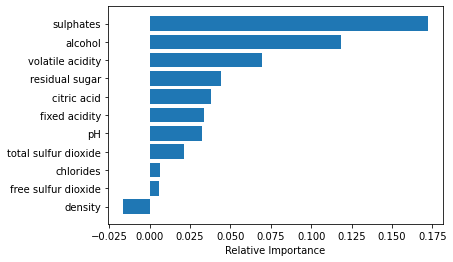

In [43]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

perm_importance = permutation_importance(best_svc, X_test, y_test)

feature_names = wine_data.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Relative Importance")

In [44]:
type(np.array(wine_data.columns))

numpy.ndarray

### Random Forest Metrics

In [45]:
print("Random Forest MAE: {}".format(np.sqrt(mean_absolute_error(y_test, y_pred_rf))))
print("Random Forest RMSE: {}".format(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R-Squared: {}".format(r_squared(y_test, y_pred_rf)))

Random Forest MAE: 0.6696847889940567
Random Forest RMSE: 0.3662317697582037
Random Forest R-Squared: 0.3483869291319398


array([0.04448698, 0.10032957, 0.05740936, 0.05181234, 0.06323481,
       0.03880475, 0.07802551, 0.05315627, 0.0585526 , 0.14515765,
       0.30903018])

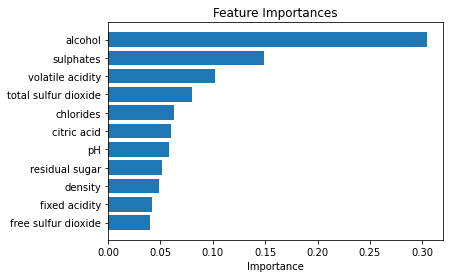

In [46]:
temp_wine_data = pd.get_dummies(wine_data)
display(rf.feature_importances_)

features = temp_wine_data.columns
importances = rf_temp.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

#### Performance Comparison:
Based on the three metrics calculated for both RF and SVM, there seems to little difference between the metrics of RMSE and MAE between the two models. However, RF seems to perform better in the R-squared metric than the SVM. Thus, out of the 2 models, the RF model does better, but not by much.

In [47]:
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'goodquality'],
      dtype='object')

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

#### Training Loss and Validation Loss (where loss is expressed in MAE)

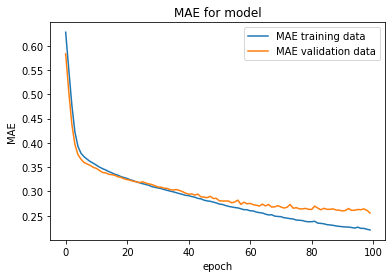

In [48]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

#### Training Accuracy and Validation Accuracy

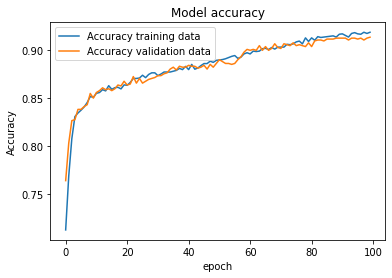

In [49]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Accuracy, Precision, and Recall

In [50]:
discrete_y_pred_nn = []

for e in y_pred_nn:
    discrete_y_pred_nn.append(np.argmax(e))

len(discrete_y_pred_nn)

1020

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(y_test_nn, discrete_y_pred_nn), 3)
precision = round(precision_score(y_test_nn, discrete_y_pred_nn, average='macro'), 3)
recall = round(recall_score(y_test_nn, discrete_y_pred_nn, average='macro'), 3)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))

accuracy: 0.914
precision: 0.916
recall: 0.915


### Conclusion

*TODO*

In conclusion, based on the features derived from the Random Forest Regression Model, the most important feature seems to be alcohol, suphates, and volatile acidity. Whereas, the least important features seem to be free sulfur dioxide, fixed acidity, and density. On the otherhand, the most important features dictated by the SVM models seem to alcohol, volatile, acidity and suphates. Whereas, the least important are chlorides, pH, and free sulfur dioxide. Since, the same set of features are indicated as the most important by both models, we can say that the most important factors in wine creation are alcohol, suphates, and the volatile acidity. With regards to the least important aspects that must be removed or minimize, I suggest that we remove free sulfur dioxide since it appears as the least important feature in both results from both models. Furthermore, there doesn't seem to be any noticeable improvement in the loss or accuracy of the test and validation data of the Classification Neural Network based on the removal of the least important features from either models. To see the loss and accuracy figures of the Neural Net from the removal of the least important features from SVM, please go to the next section.

## Extra Section: Results from Removing Features indicated in the SVM model.

In [52]:
wine_data = pd.read_csv("winequality-red.csv", sep=",")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(wine_data))
print(z.shape)

threshold = 3
wine_data = wine_data[(z < threshold).all(axis=1)]
wine_data.shape

(1599, 12)


(1451, 12)

In [54]:
wine_data['goodquality'] = [1 if x >= 7 else 0 for x in wine_data['quality']]
X = wine_data.drop(['quality','goodquality'], axis = 1)
y = wine_data['goodquality']


### Here we remove the features corresponding to the least important as dictated by the trained SVM model

In [55]:
del X['density']
del X['pH']
del X['free sulfur dioxide']

In [56]:
from imblearn.over_sampling import SMOTE

sample_size = 1700
oversample = SMOTE(sampling_strategy={0: sample_size, 1: sample_size})
X, y = oversample.fit_resample(X, y)

C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1250)
  warnings.warn(
C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1250)
  warnings.warn(


In [57]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=.25, random_state=0)

In [58]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_nn = sc.fit_transform(X_train_nn)
X_test_nn = sc.fit_transform(X_test_nn)

In [59]:
n_classes = 2 # because we only have 6 categories
y_train_cat = tf.keras.utils.to_categorical(y_train_nn, n_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test_nn, n_classes)

In [60]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [61]:
model.compile(loss ="binary_crossentropy", optimizer = 'adam', metrics= ['accuracy'])

In [62]:
history = model.fit(X_train_nn, y_train_cat,  batch_size=64, epochs = 100 , validation_data = (X_test_nn, y_test_cat))

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6008 - val_loss: 0.6225 - val_accuracy: 0.7576
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7584 - val_loss: 0.5335 - val_accuracy: 0.8094
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7976 - val_loss: 0.4558 - val_accuracy: 0.8282
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.8141 - val_loss: 0.4039 - val_accuracy: 0.8424
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8251 - val_loss: 0.3766 - val_accuracy: 0.8494
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8298 - val_loss: 0.3607 - val_accuracy: 0.8565
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8345 - val_loss: 0.3524 - val_accuracy: 0.8553
Epoch 8/100
4

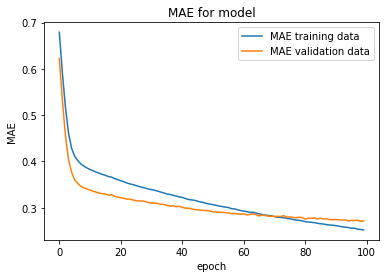

In [63]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [64]:
y_pred_nn = model.predict(X_test_nn)

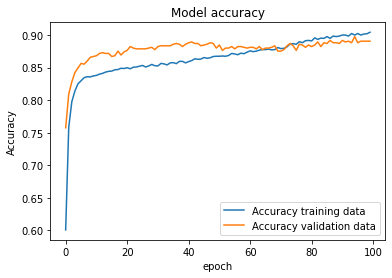

In [65]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

discrete_y_pred_nn = []

for e in y_pred_nn:
    discrete_y_pred_nn.append(np.argmax(e))

accuracy = round(accuracy_score(y_test_nn, discrete_y_pred_nn), 3)
precision = round(precision_score(y_test_nn, discrete_y_pred_nn, average='macro'), 3)
recall = round(recall_score(y_test_nn, discrete_y_pred_nn, average='macro'), 3)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(precision))


accuracy: 0.891
precision: 0.892
recall: 0.892
